# Final Project

Tianjiao Huang

Stella Lau

## Data exploration

We loaded the labels into a Pandas dataframe and have it describe the data. We plotted the histogram of the emotions and we found that the majority of them are neutral and happiness. We also plotted the histogram of the user.id and found that the majority of images were uploaded by users dwdii and 302. The users dwdii, 302, and JN721 uploads mostly pictures that are classified as neutral and happiness. The user jhamski uploads mostly pictures that are classified as happiness. The user 628 uploaded 4 images that are each classified as anger, surprise, disgust, and fear.

In [27]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pathlib

DATA_DIR = "facial_expressions/data"
IMAGE_DIR = "facial_expressions/images"

data = pd.read_csv(f'{DATA_DIR}/legend.csv')
data['emotion'] = data['emotion'].str.lower()
data.describe()

,user.id,image,emotion
count,13690,13690,13690
unique,5,13682,8
top,dwdii,Kimberly_Stewart_0001.jpg,neutral
freq,6667,2,6868


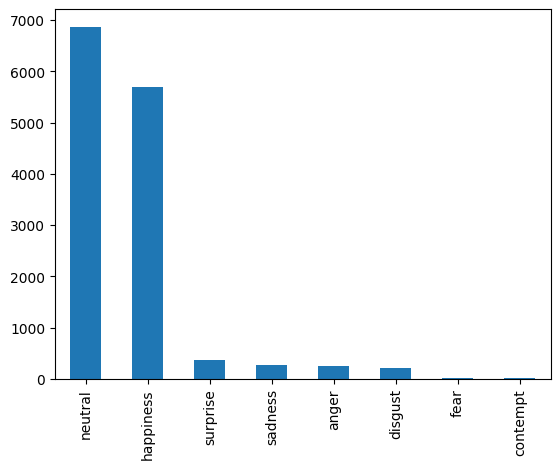

In [28]:
data['emotion'].value_counts().plot(kind='bar')
plt.show()

dwdii      6667
302        5598
jhamski     921
JN721       500
628           4
Name: user.id, dtype: int64


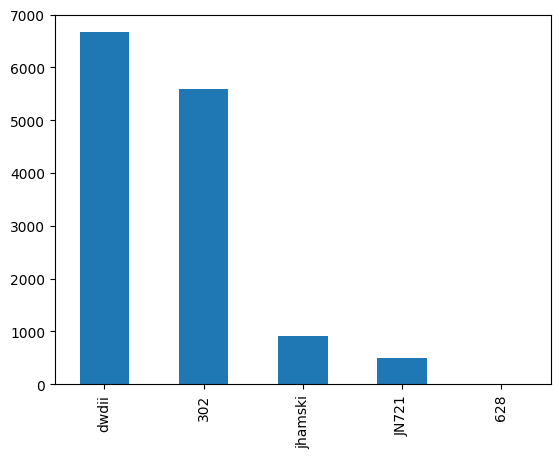

In [29]:
users = data['user.id'].value_counts()
user_names = users.index.tolist()
print(users)
users.plot(kind='bar')
plt.show()

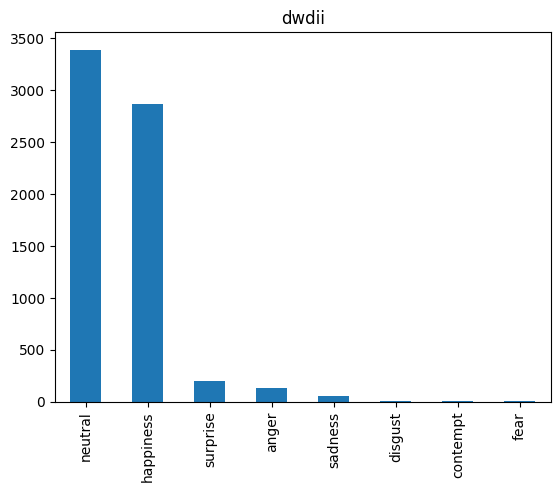

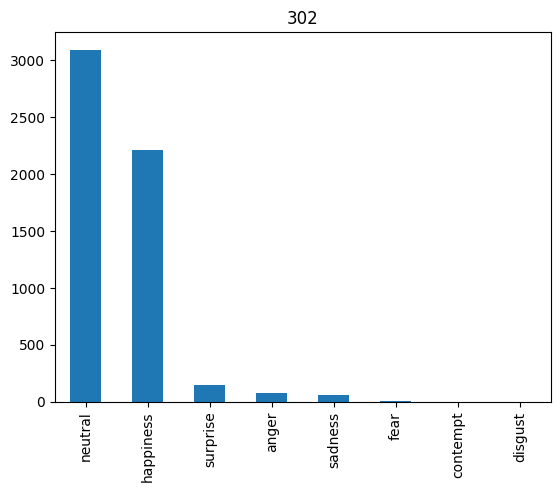

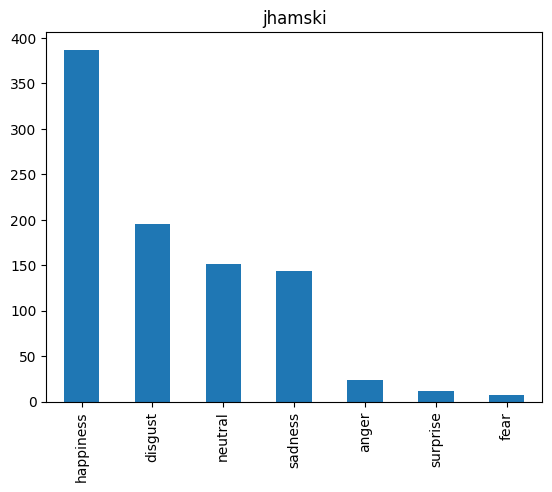

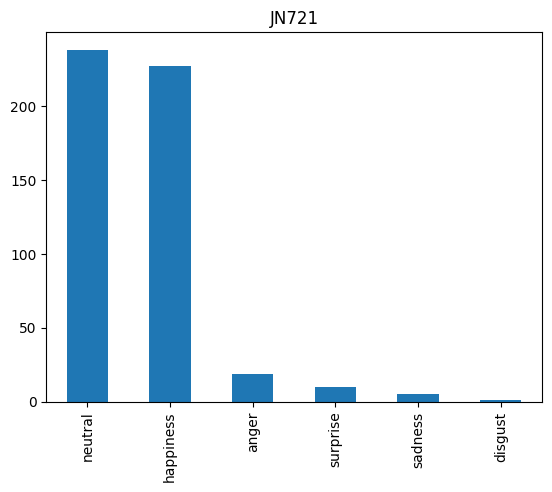

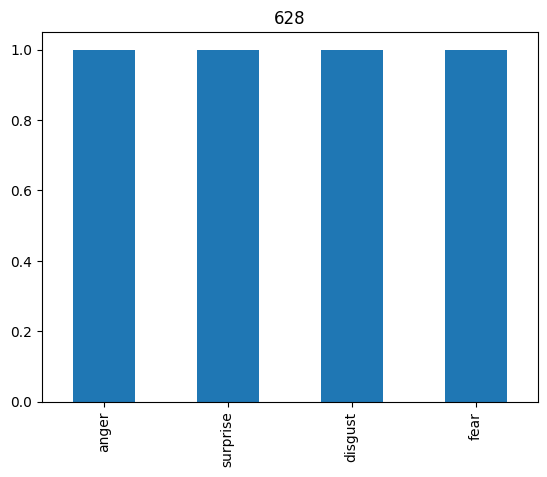

In [30]:
for user_name in user_names:
    user_data = data.loc[data['user.id'] == user_name]
    plt.figure()
    plt.title(user_name)
    user_data['emotion'].value_counts().plot(kind='bar')
    plt.show()

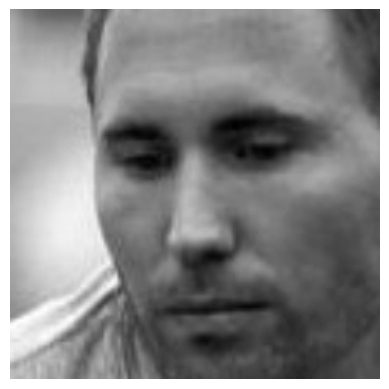

In [46]:
image_paths = list(pathlib.Path(IMAGE_DIR).glob('*.jpg'))
image = plt.imread(str(image_paths[0]))
plt.imshow(image, cmap="gray")
plt.axis('off')
plt.show()

## Experiments

## Conclusion